<a href="https://colab.research.google.com/github/kalyankalluri999/CMT307_AppliedMachineLearning/blob/main/Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:-** 
These days people merely sleep, disregarding the health benefits sleep offers the body. The Smart-Yoga Pillow (SaYoPillow) is a suggested edge gadget that aims to fully materialize the concept of "Smart-Sleeping" and assist in understanding the relationship between stress and sleep. It is suggested to develop an edge processor using a model that examines both sleeping patterns and the physiological changes that take place when we sleep. It is suggested to make a stress prediction for the following day based on these changes throughout sleep. It is implemented to safely transport the analyzed stress data and average physiological changes to the IoT cloud for storage. It is also suggested to transfer data securely from the cloud to any applications run by other parties.

Below steps are performed:-

1.   **Exploratory Data Analysis**

2.   **Data Preprocessing**

3.   **Model Implemetation**

4.   **Results**

# **Exploratory Data Analysis**

**Used below python Libraries for performing the data analysis**


In [1]:
import pandas as pd
# Pandas library used for data analysis and manipulation
import numpy as np #Numpy library used for Mathematical operations
#Seaborn and Matplotlib libraries are used for plotting
import seaborn as sns   
import matplotlib.pyplot as plt

**Importing the dataset and reading it using Pandas library**

In [2]:
sleep = pd.read_csv('SaYoPillow.csv')
sleep.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


**No of columns in the dataset**

In [3]:
sleep.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

**Renaming the columns**

In [4]:
sleep.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sr.1':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'}, inplace = True)

In [5]:
sleep.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

**.head() is used to dsiplay top rows in the dataset**

In [6]:
sleep.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


**.tail() is used to showcase Bootom rows in the dataset**

In [7]:
sleep.tail()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


**Understanding the size and shape of the dataset**



In [8]:
sleep.shape

(630, 9)

**.dtypes() is a method used to Return the data types in the DataFrame. This returns a Series with the data type of each column.**

In [9]:
sleep.dtypes

snoring rate        float64
respiration rate    float64
body temperature    float64
limb movement       float64
blood oxygen        float64
eye movement        float64
sleeping hours      float64
heart rate          float64
stress level          int64
dtype: object

**.info() function gives details about a DataFrame including the index data type columns, non-null values and memory usage.**

In [10]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  630 non-null    float64
 3   limb movement     630 non-null    float64
 4   blood oxygen      630 non-null    float64
 5   eye movement      630 non-null    float64
 6   sleeping hours    630 non-null    float64
 7   heart rate        630 non-null    float64
 8   stress level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


**.describe() is a method used to describe overall data details in the DataFrame**

In [11]:
sleep.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


**.nunique - Displays the uniqie values**

In [12]:
sleep.nunique()

snoring rate        627
respiration rate    626
body temperature    626
limb movement       626
blood oxygen        626
eye movement        626
sleeping hours      501
heart rate          626
stress level          5
dtype: int64

**There are no categorical variables present in the dataset**

**Understanding data using pair plot**

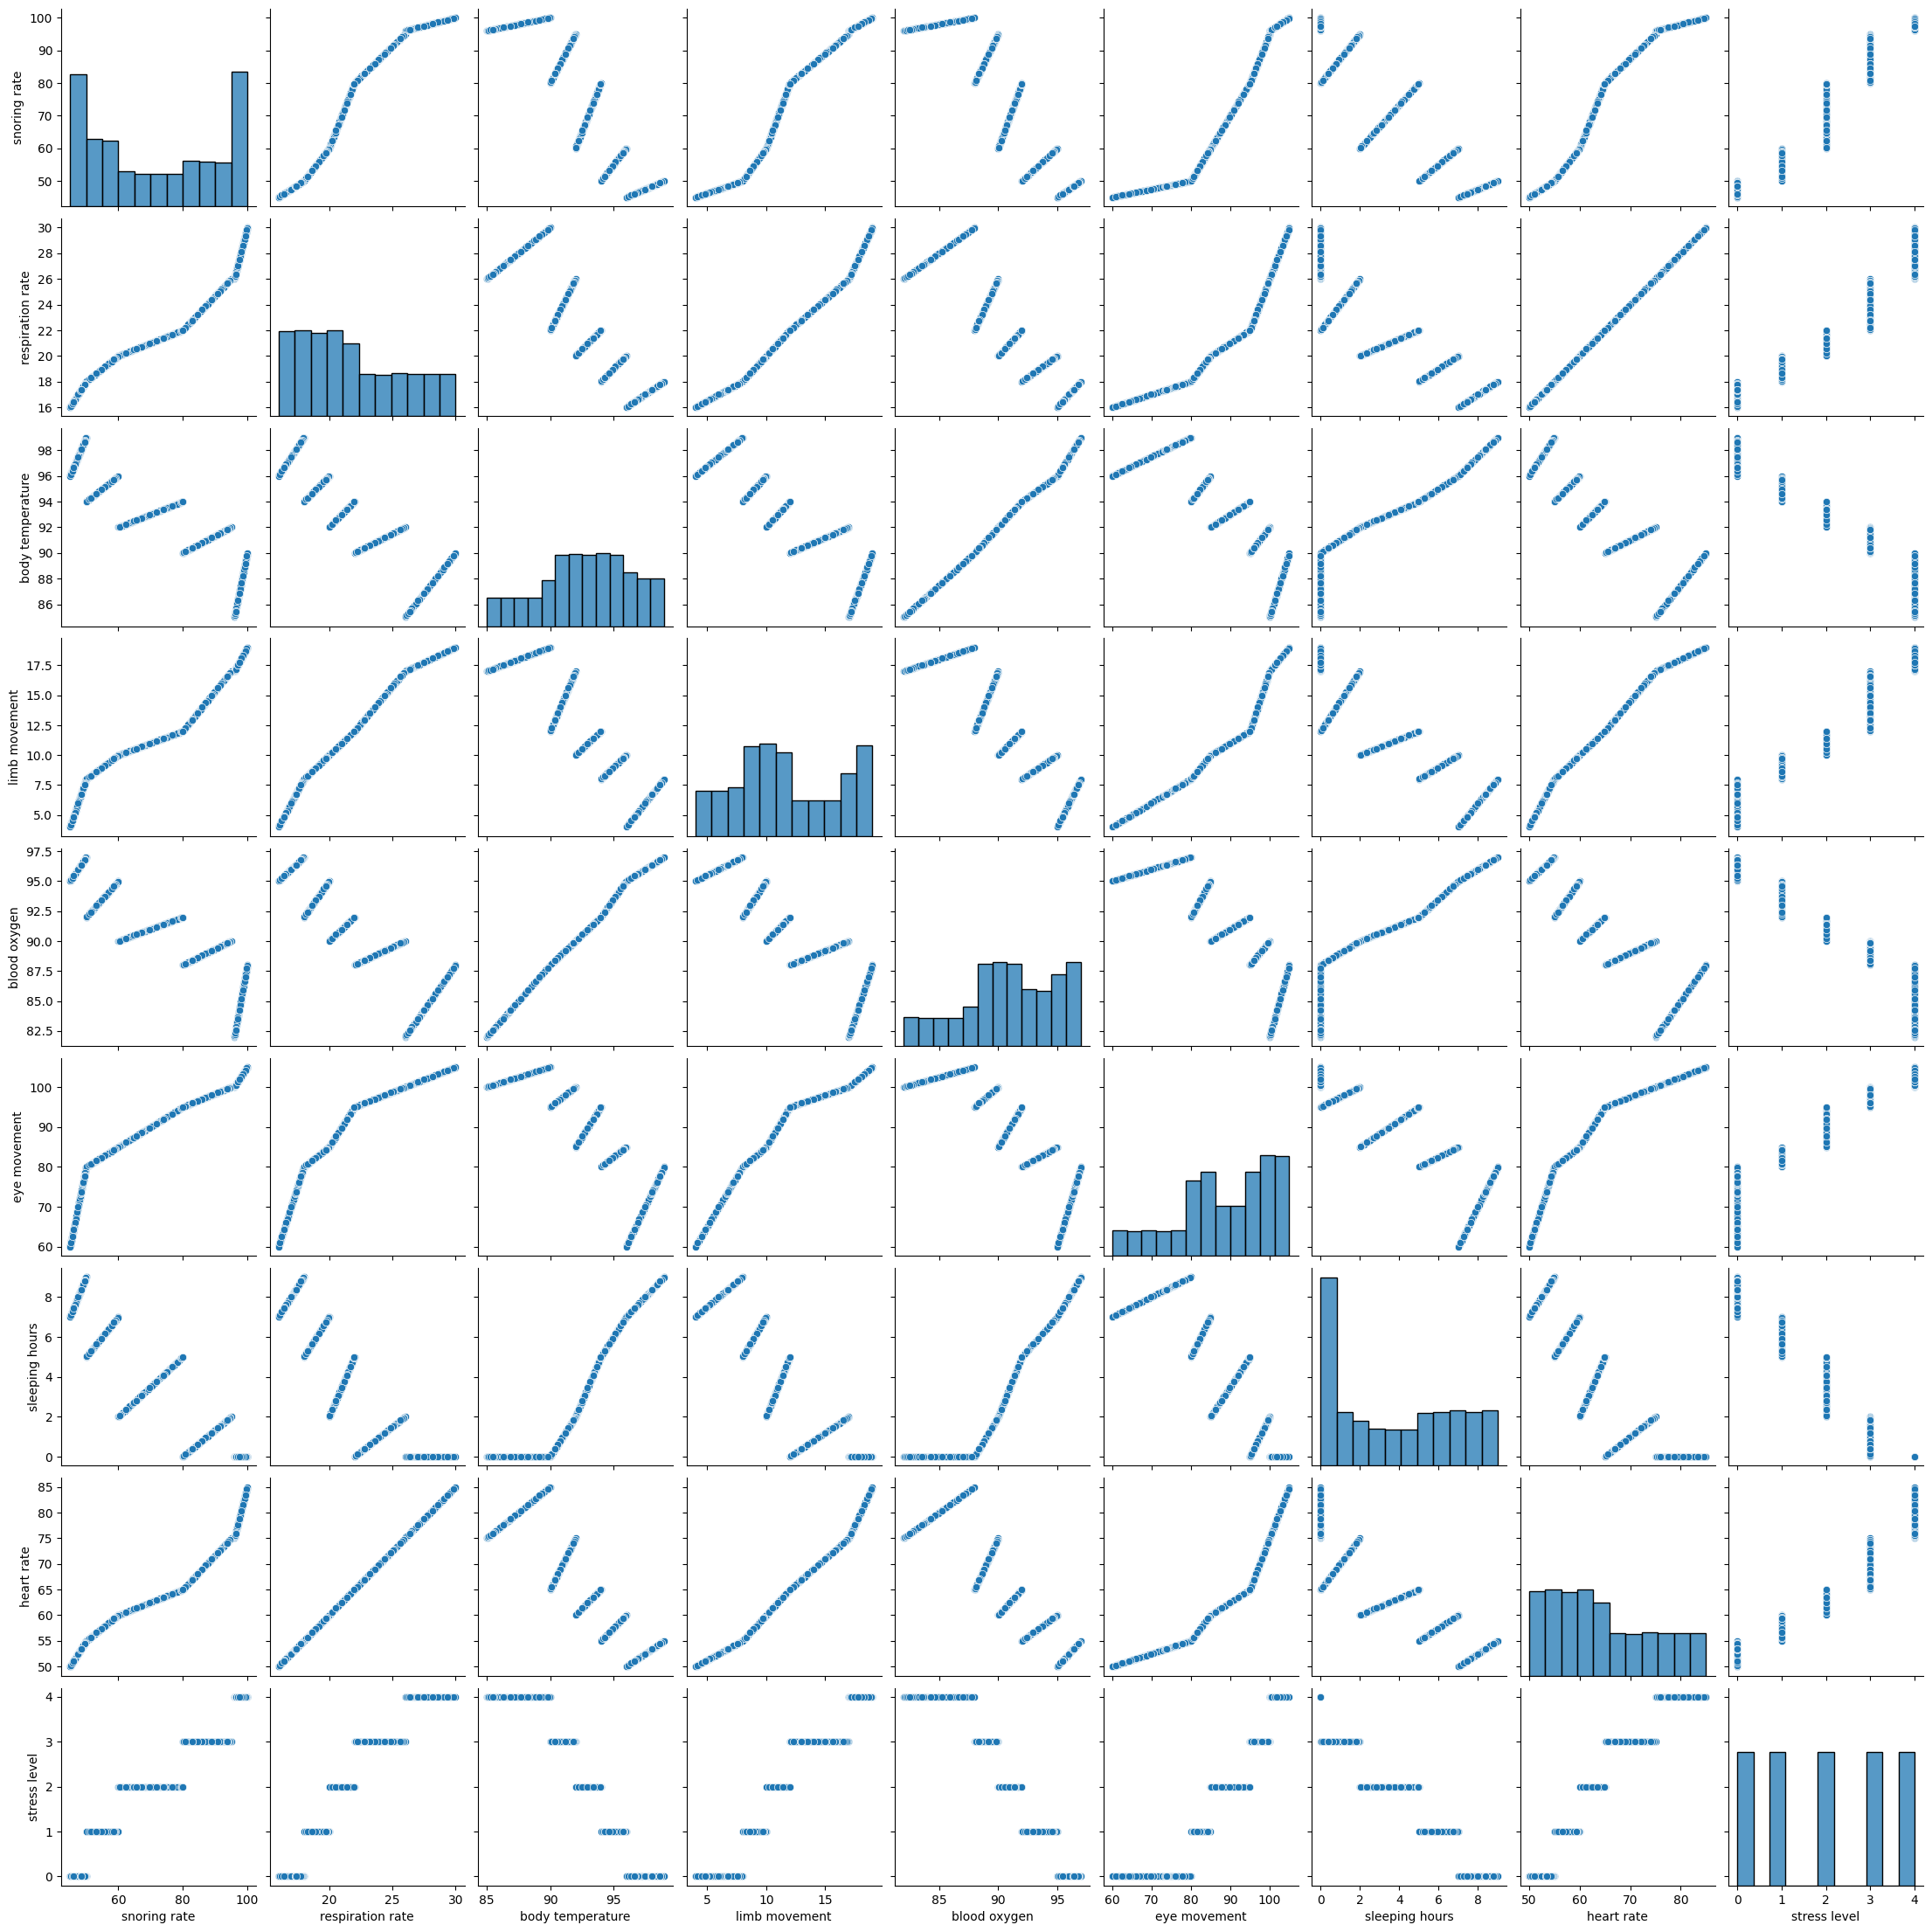

In [13]:
sns.pairplot(sleep)

**Understanding data using Boxplot**

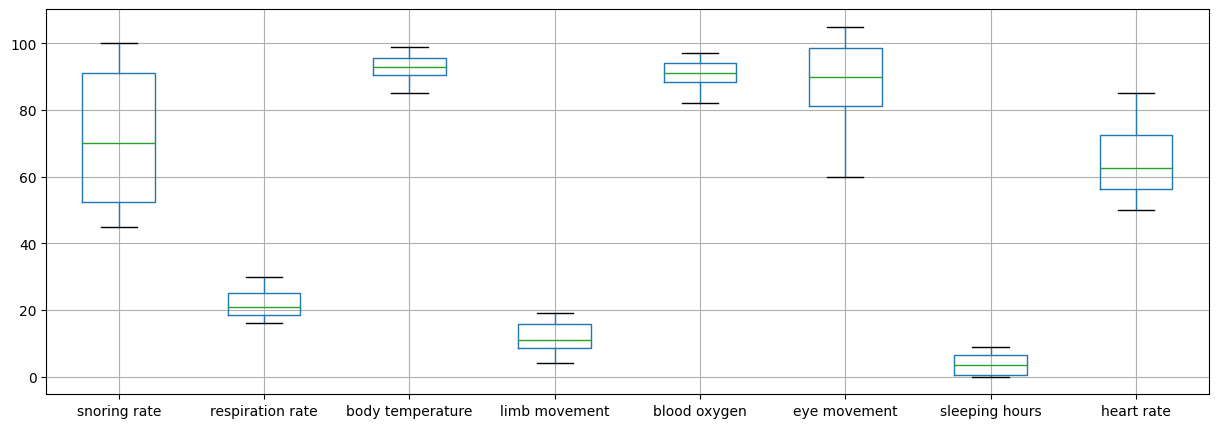

In [14]:
BT = sleep.boxplot(column=['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate'],figsize=(15,5))

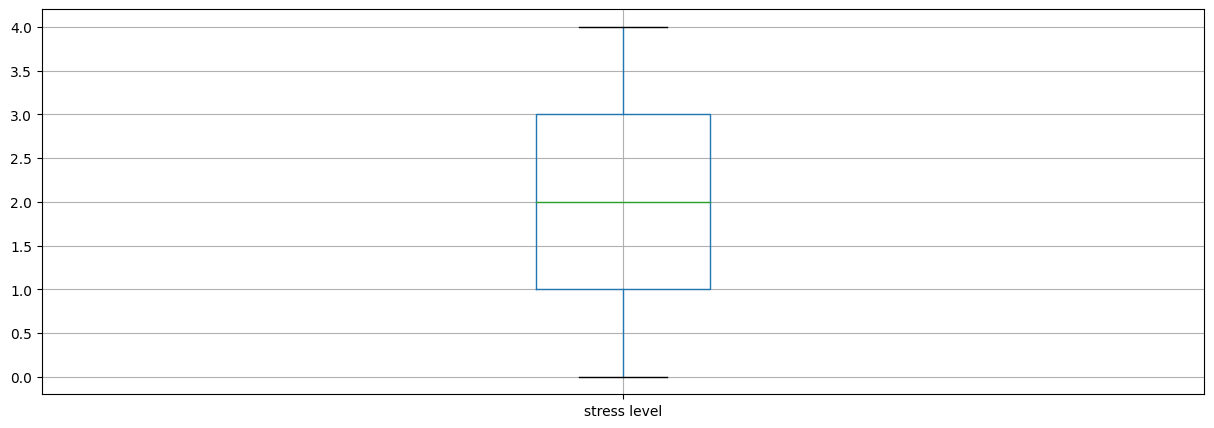

In [15]:
BT = sleep.boxplot(column=['stress level'],figsize=(15,5))

**Understanding data using Histogram**

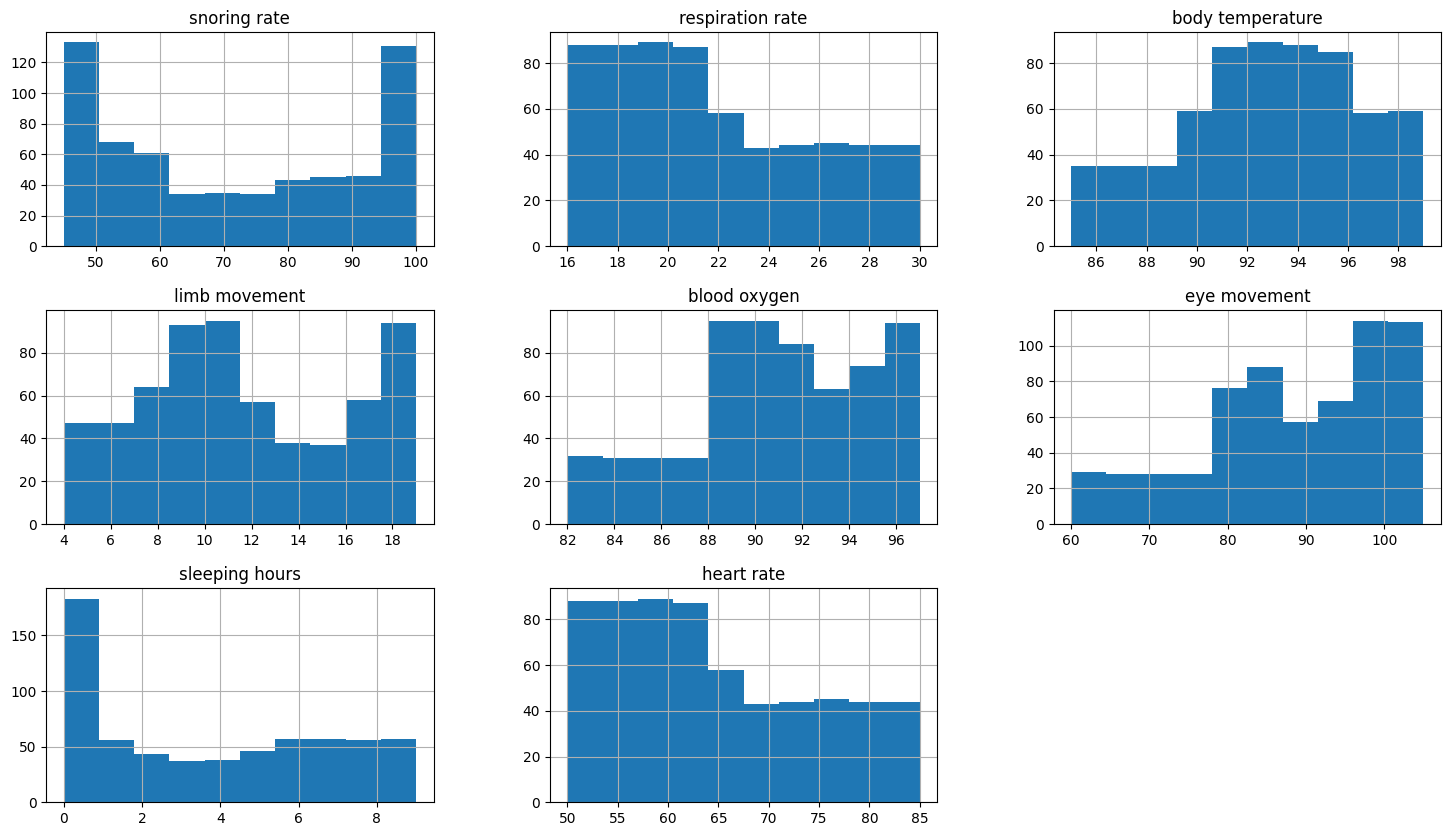

In [16]:
hp = sleep.hist(column=['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate'],figsize=(18,10))

**Understanding data using Displot**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

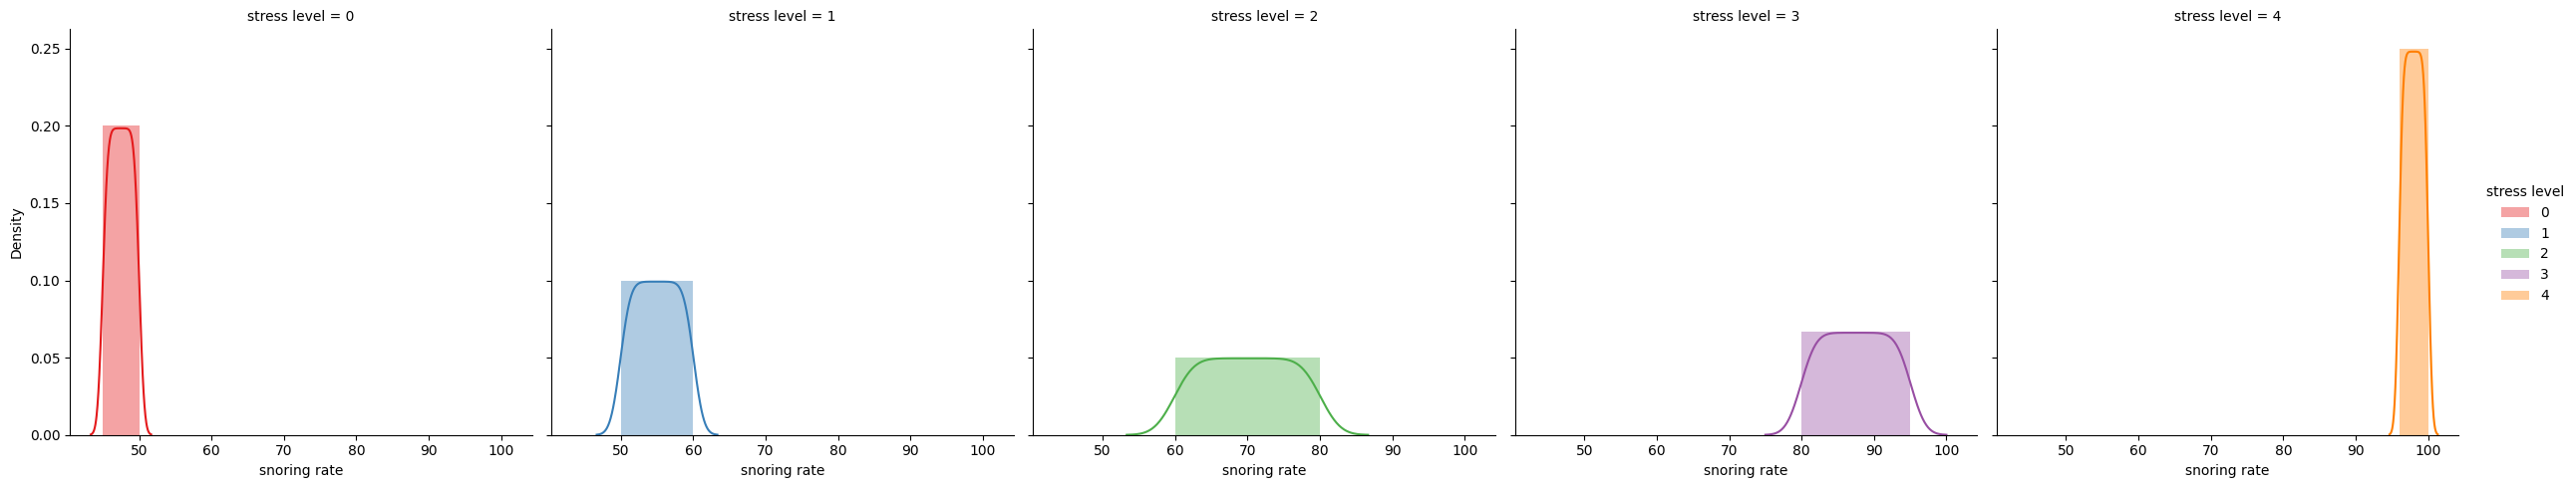

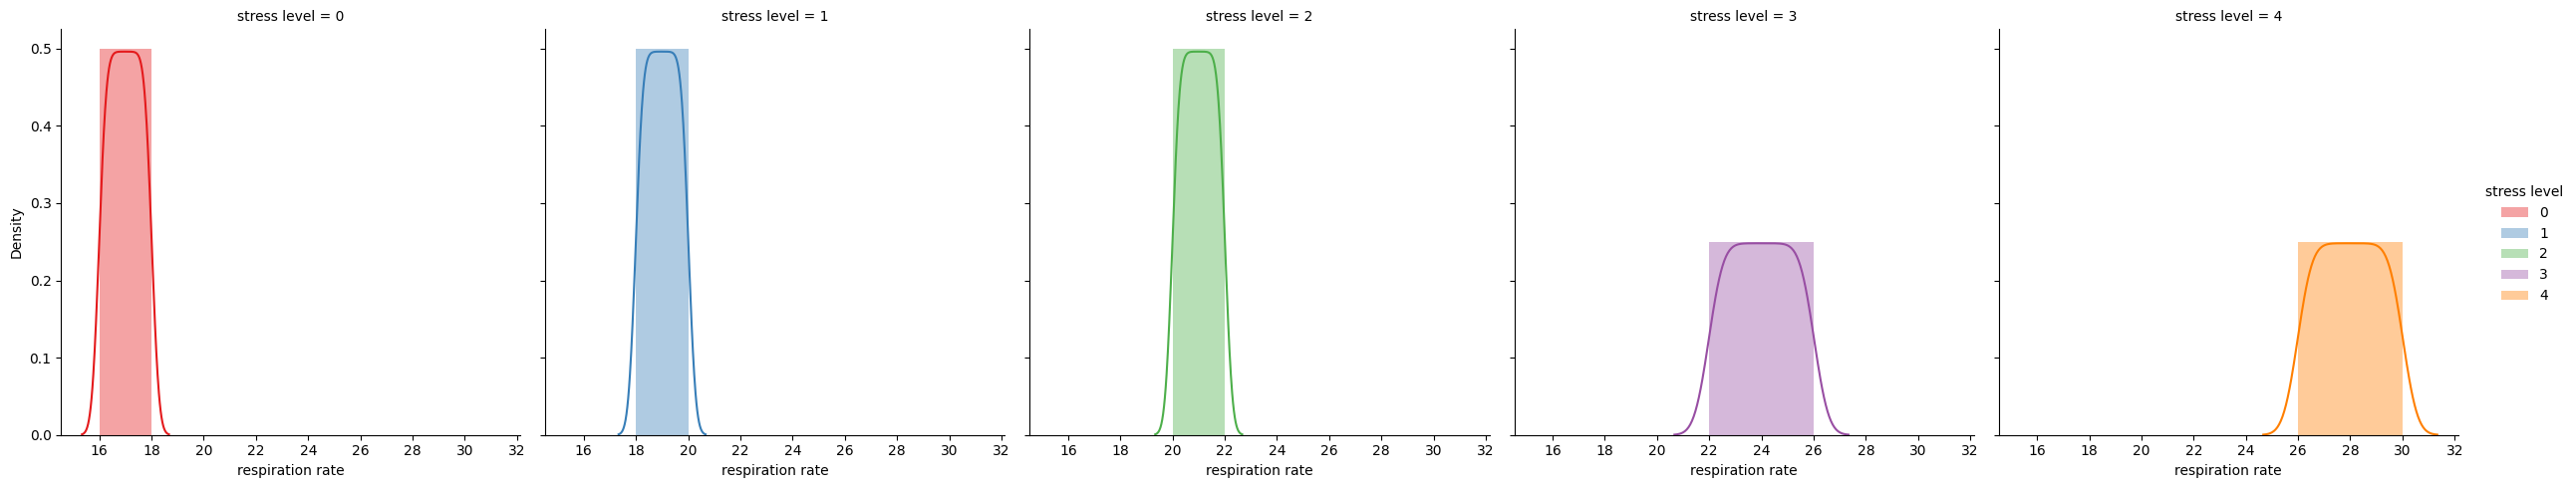

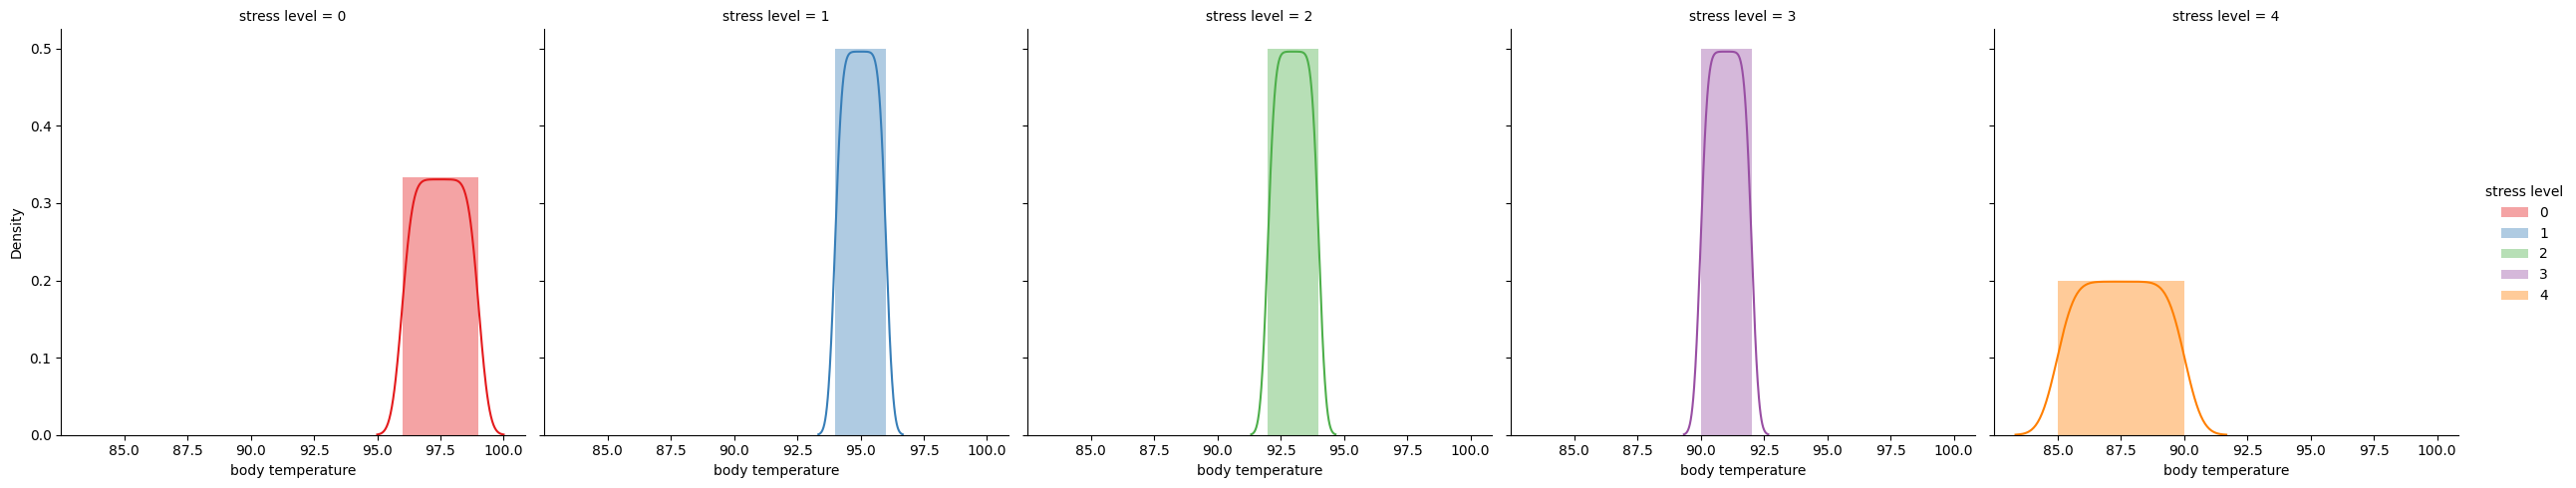

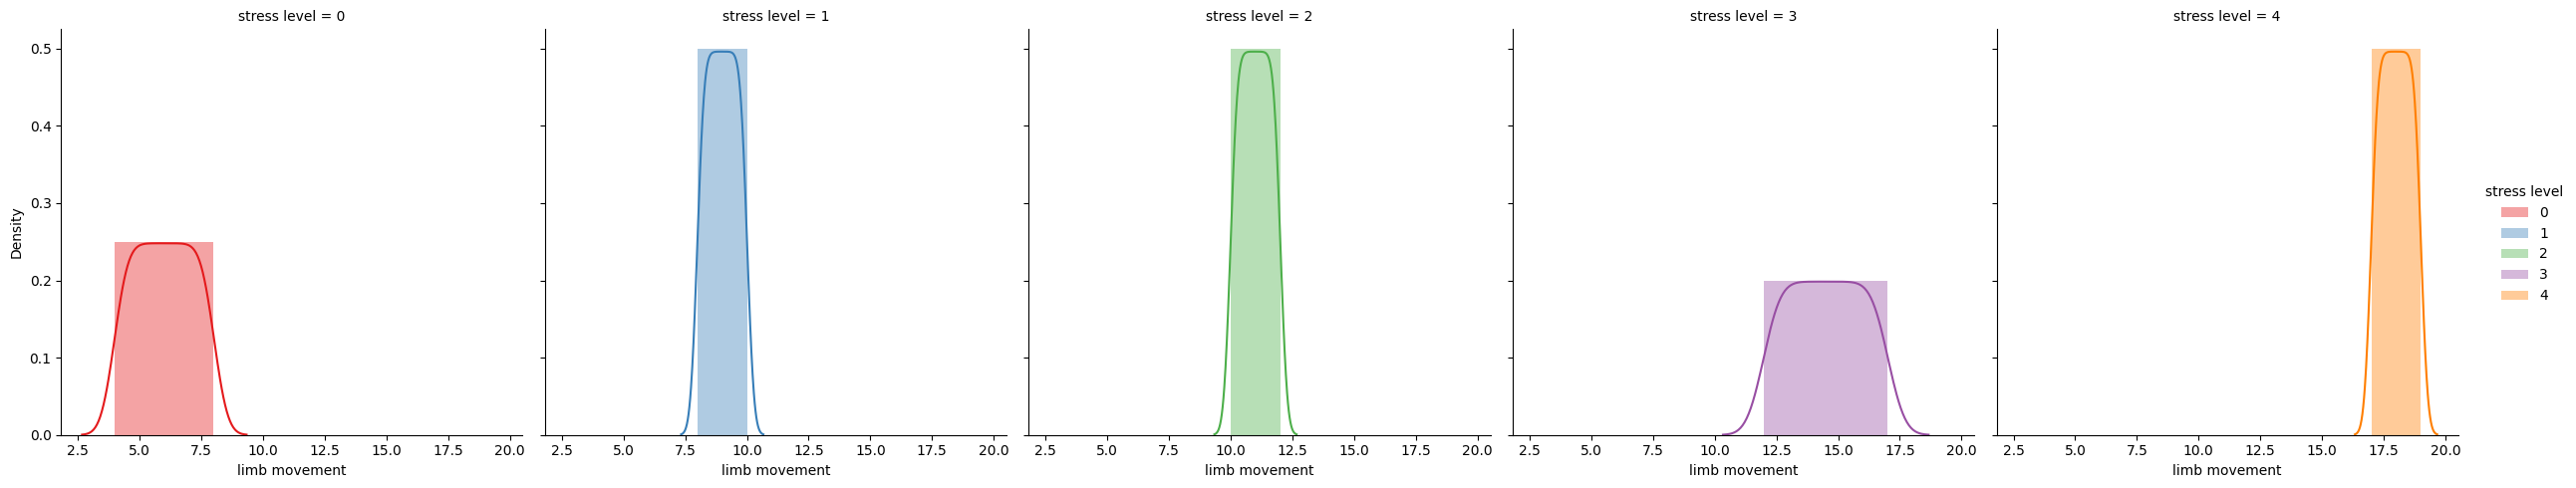

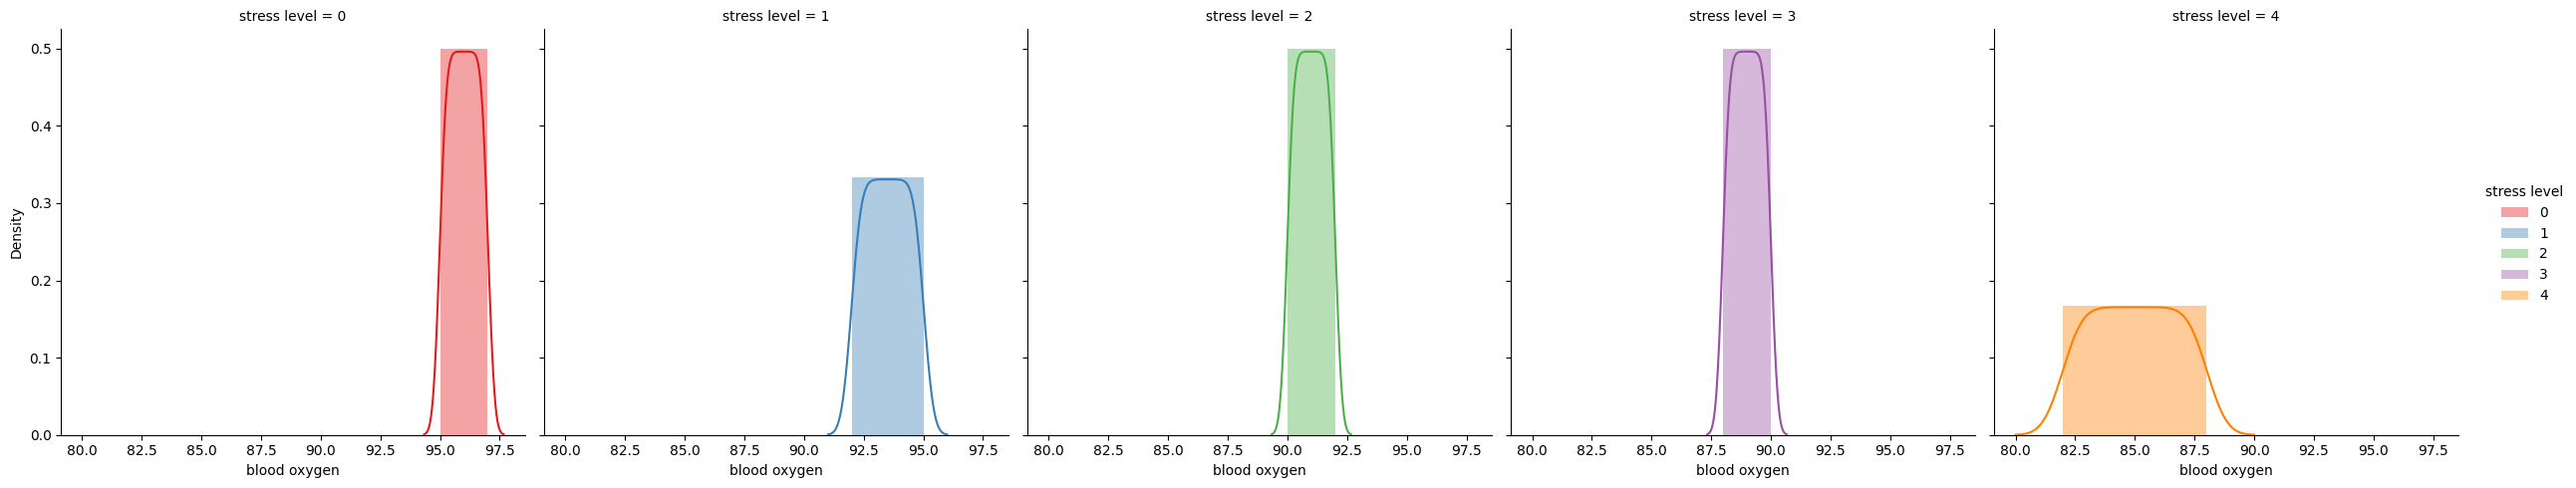

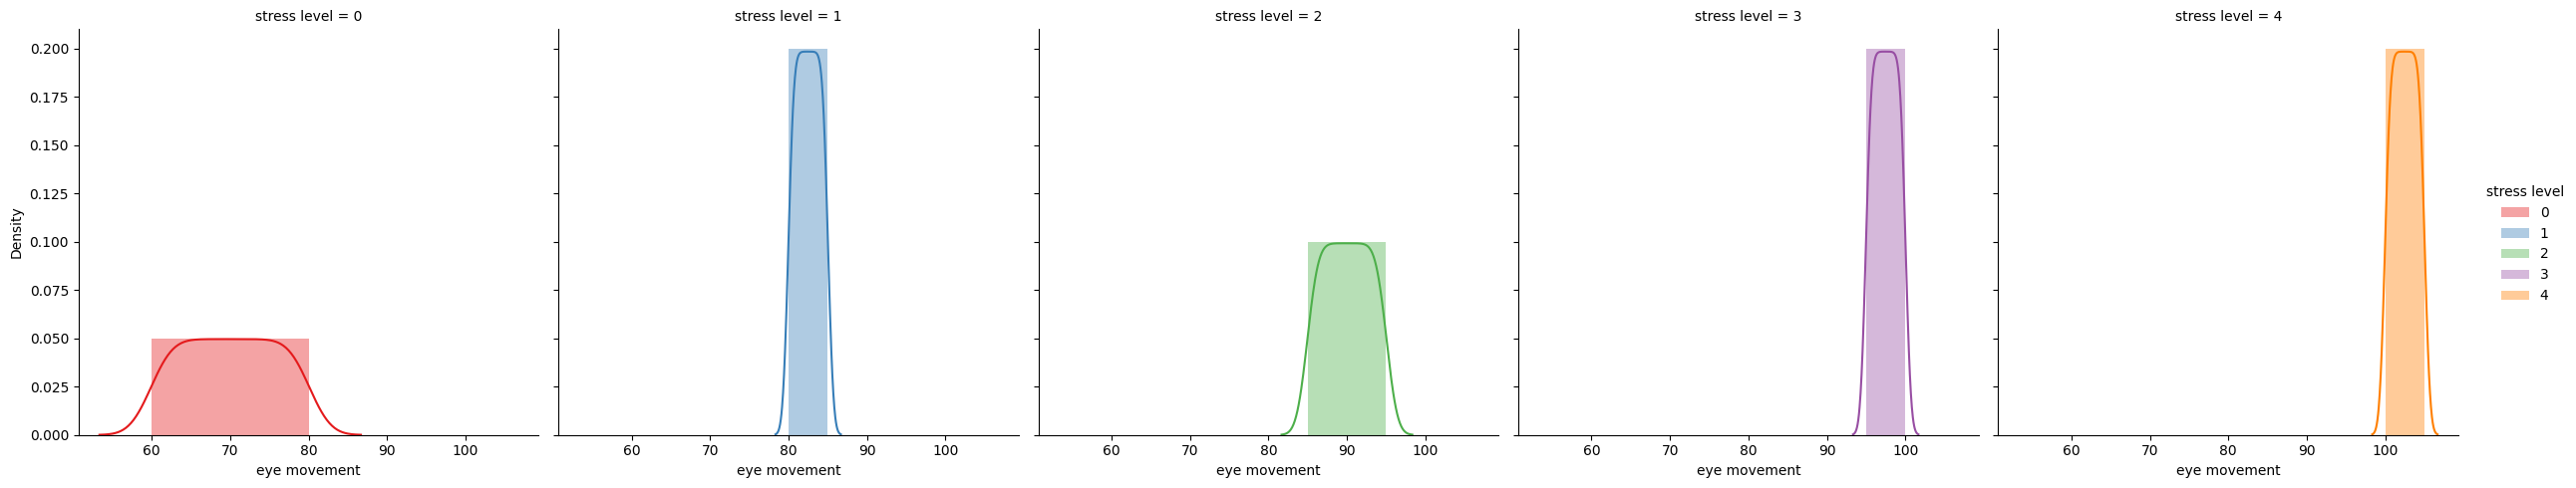

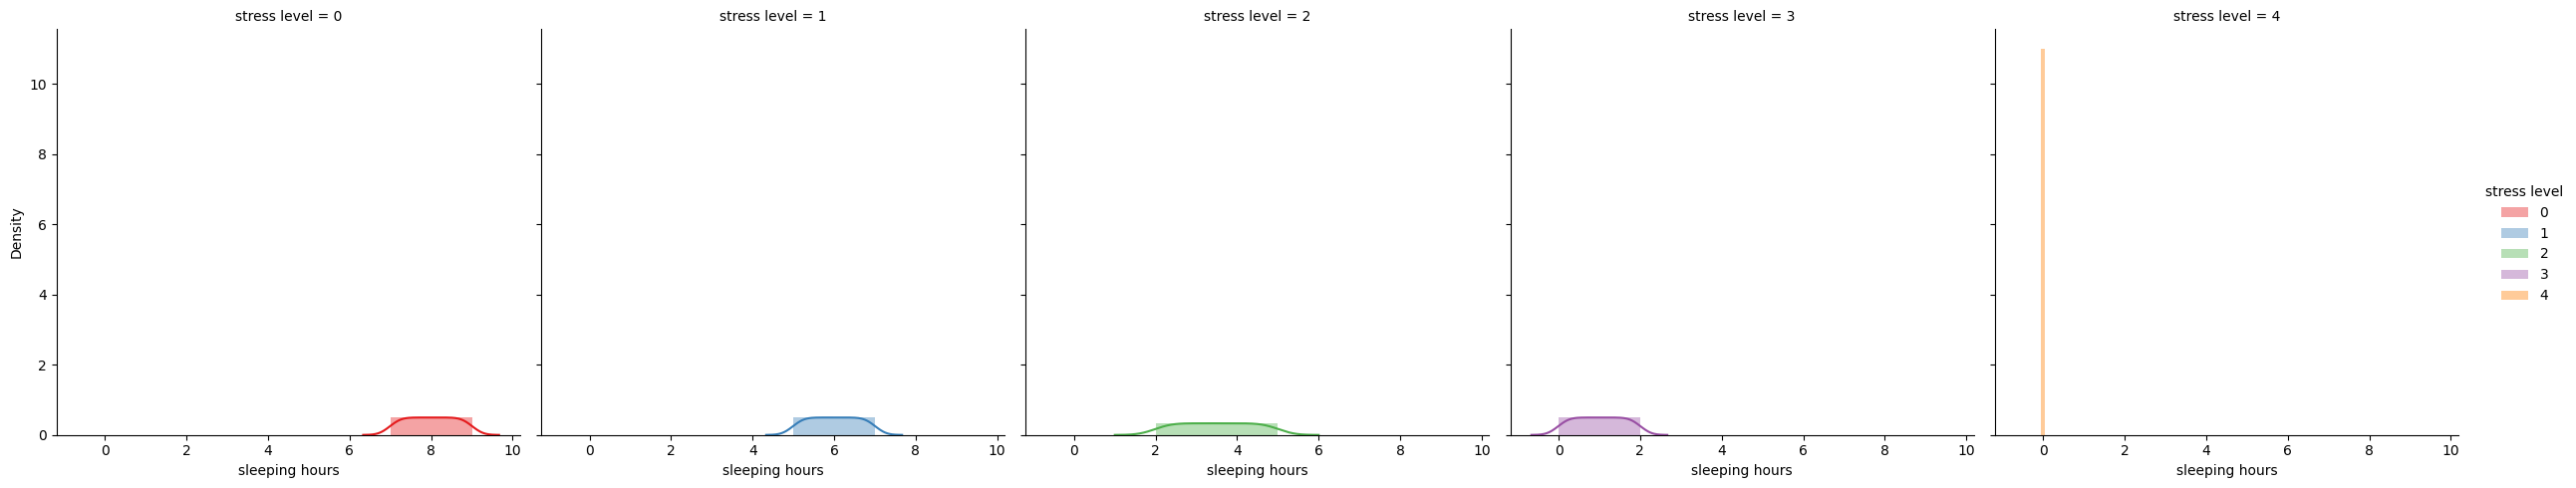

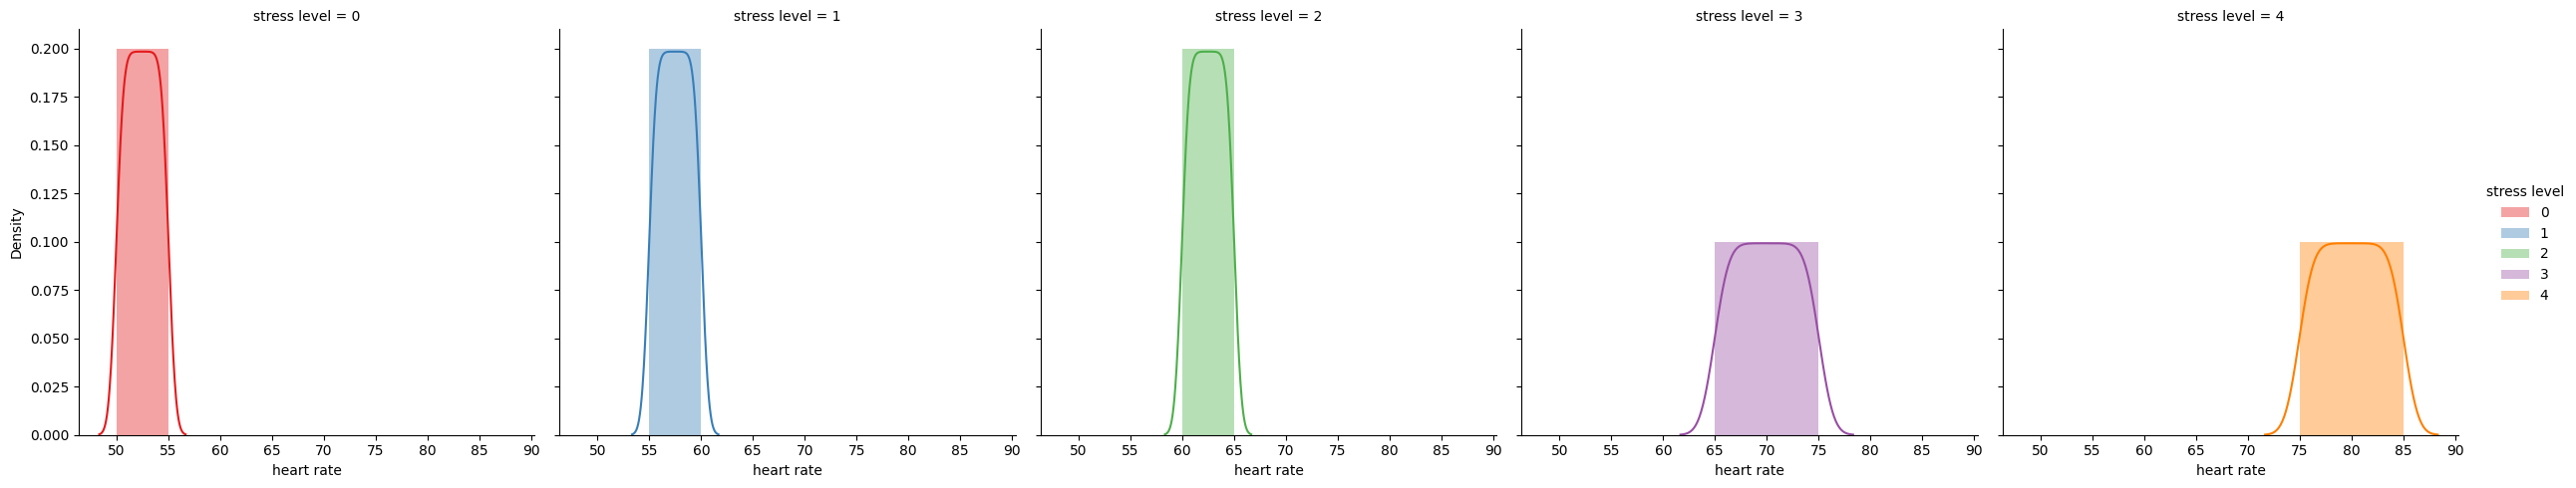

In [17]:
for column in sleep.columns.to_list()[:-1]:
    g = sns.FacetGrid(sleep, col="stress level", hue="stress level", palette="Set1",height=5)
    g = (g.map(sns.distplot, column).add_legend())

In [18]:
import plotly.express as pax
def comparisonplot(data, column1, column2, target):
    figure = pax.scatter(data_frame = data, x=column1,
                    y=column2, color= target)
    figure.show()


**Exploring each variable/columns**

In [19]:
cols = []
for col1 in sleep.columns:
    cols.append(col1)
    for col2 in sleep.columns:
        if col2 not in cols:
            comparisonplot(sleep,col1, col2, 'stress level')

**Finding coorelation between variables**

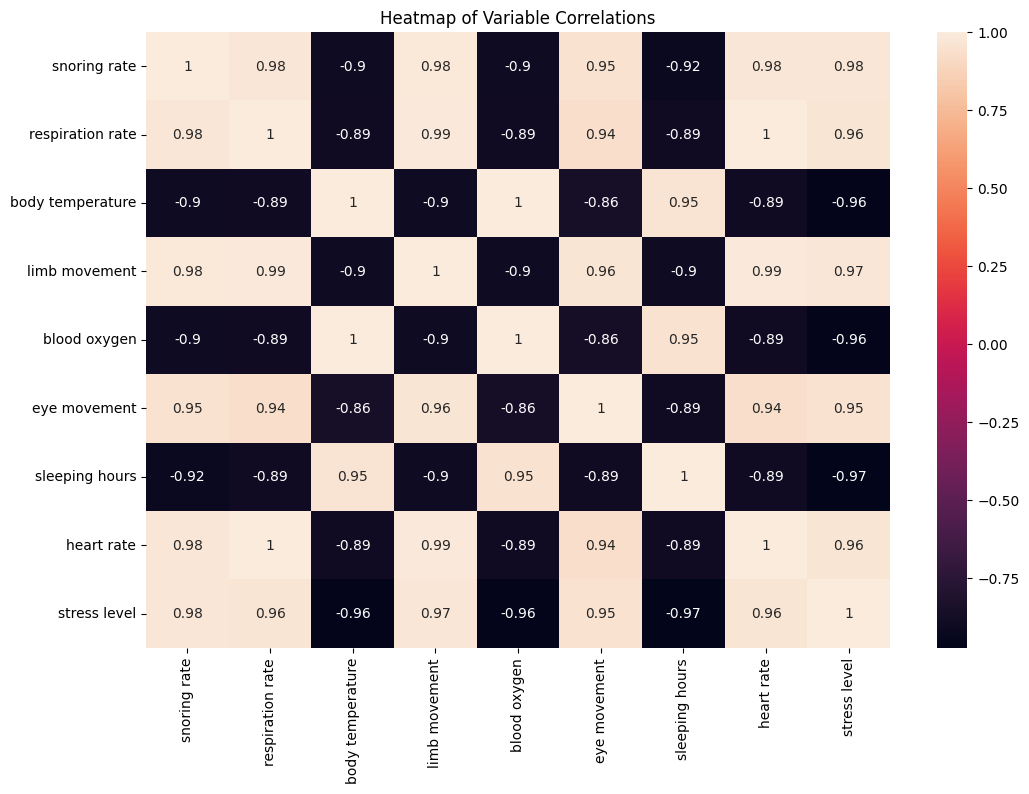

In [20]:

import matplotlib.pyplot as pl
import seaborn as sai
pl.figure(figsize=(12,8))
sai.heatmap(sleep.corr(),annot=True)
pl.title('Heatmap of Variable Correlations')
pl.show()

**Finding Missing Values**

In [21]:
sleep.isnull().sum().sum()

0

**Finding Missing values using Heatmap**

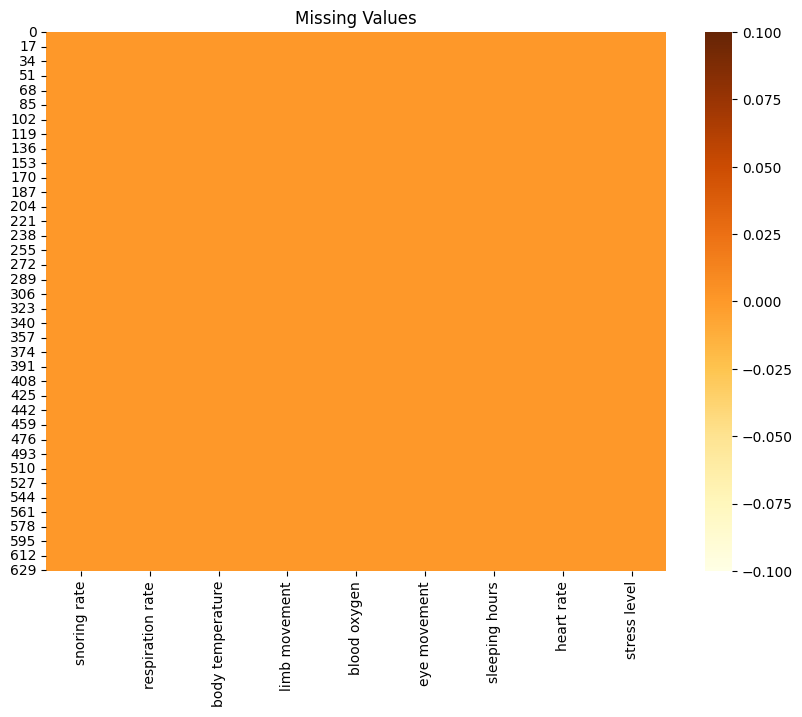

In [22]:
import matplotlib.pyplot as pl
import seaborn as sai
pl.figure(figsize=(10,7)) 
sai.heatmap(sleep.isna(), cmap='YlOrBr')
pl.title("Missing Values") 
pl.show()